**This notebook explores the specific active ingrdient 'pyrethroid' at it's usage throughout CA at the county level**

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("../src/utils").resolve()))

import numpy as np
import pandas as pd

from utils import (
    create_CA_visualization,
    demographic_intensity_correlations,
    get_aggregate_results,
    into_gdf,
    top_10_barplot,
    top_n_df,
    trendPlot,
)

In [2]:
# data
counties = pd.read_parquet(str(Path("../data/cal_counties.parquet").resolve()))
counties["Area Name"] = (counties["NAME"] + " County").str.strip()

pyrData_county = get_aggregate_results(
    "county",
    start_year=2022,
    start_month=1,
    end_year=2022,
    end_month=12,
    ai_categories="PYR",
)

pyrData_cl = pyrData_county.merge(counties[["Area Name", "geometry"]], on="Area Name")

pyrData_cl = into_gdf(pyrData_cl, "geometry")

dataFrame = pyrData_cl

,Area Name,FIPS,ai_intensity
0,Stanislaus County,06099,33.06
1,Sacramento County,06067,32.76
2,Orange County,06059,27.19
3,San Joaquin County,06077,23.27
4,Kings County,06031,22.24
5,Placer County,06061,18.76
6,Sutter County,06101,18.25
7,Fresno County,06019,17.17
8,Madera County,06039,16.97
9,Monterey County,06053,13.92


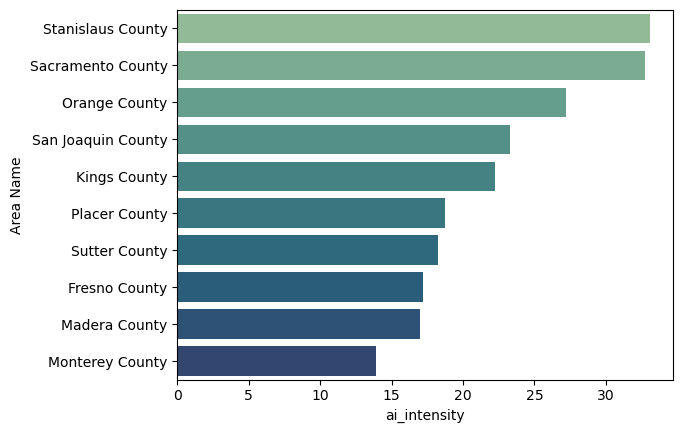

In [3]:
pyr_top_10 = top_n_df(dataFrame, "", "ai_intensity", n=10)
display(pyr_top_10)

top_10_barplot(pyr_top_10)

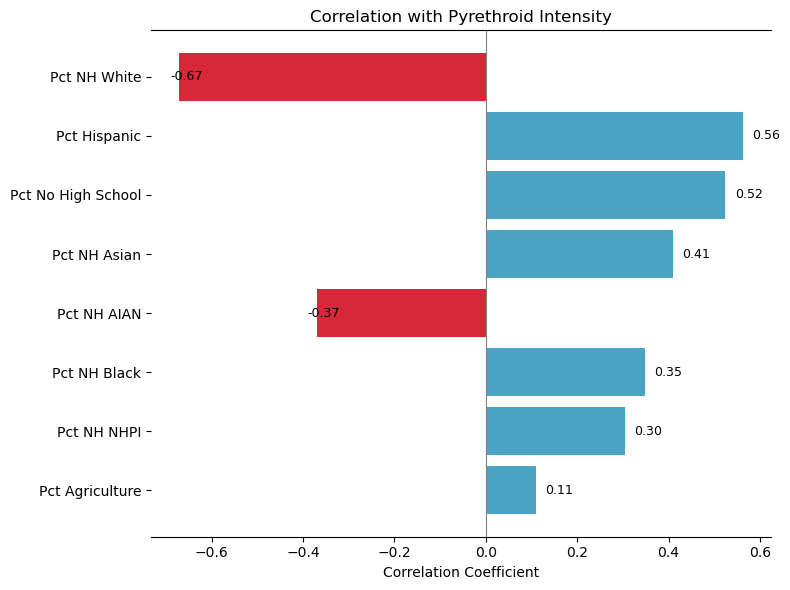

,Pyrethroid Intensity
Pct NH Black,0.348668
Pct Hispanic,0.562406
Pct NH White,-0.670297
Pct NH Asian,0.410492
Pct NH AIAN,-0.369455
Pct NH NHPI,0.304156
Pct No High School,0.524408
Pct Agriculture,0.110452


In [4]:
dataFrame["Pyrethroid Intensity"] = np.log1p(dataFrame["ai_intensity"])

demographic_intensity_correlations(dataFrame, "Pyrethroid Intensity")

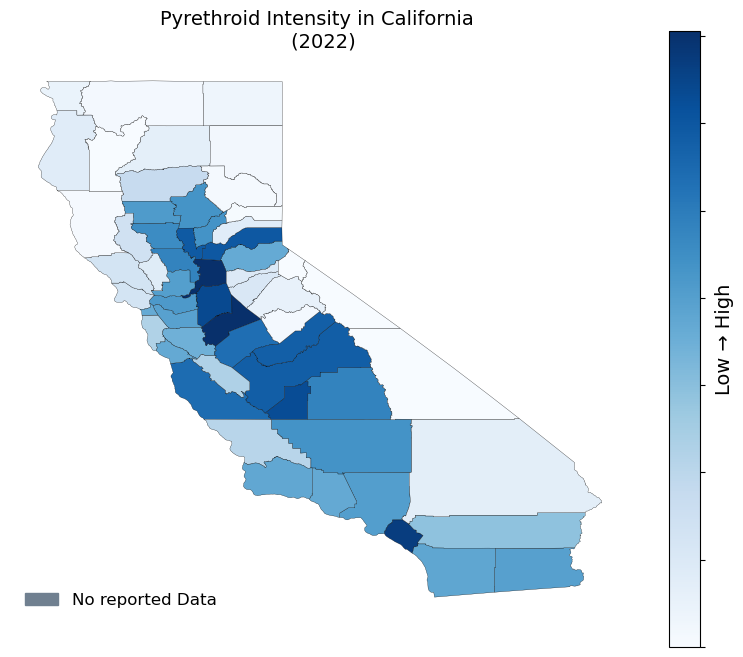

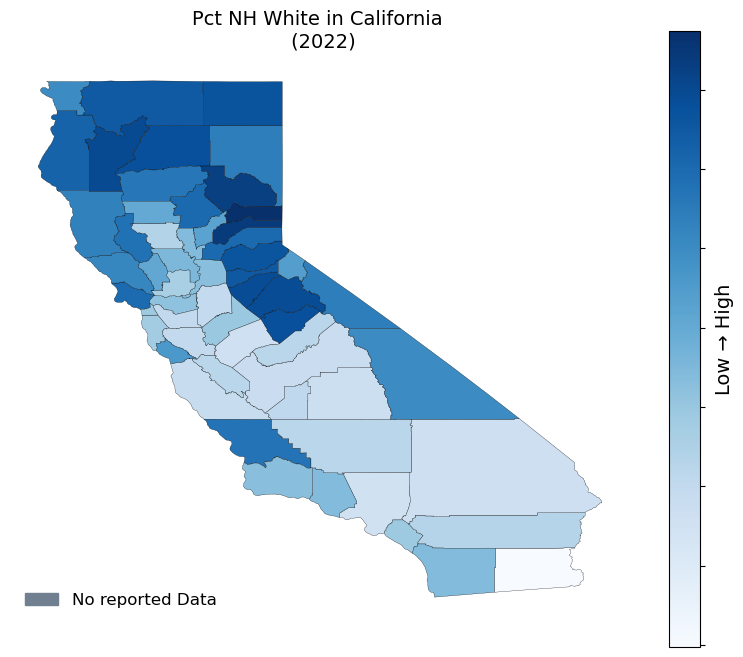

In [5]:
create_CA_visualization(dataFrame, "Pyrethroid Intensity", "2022")
create_CA_visualization(dataFrame, "Pct NH White", "2022")

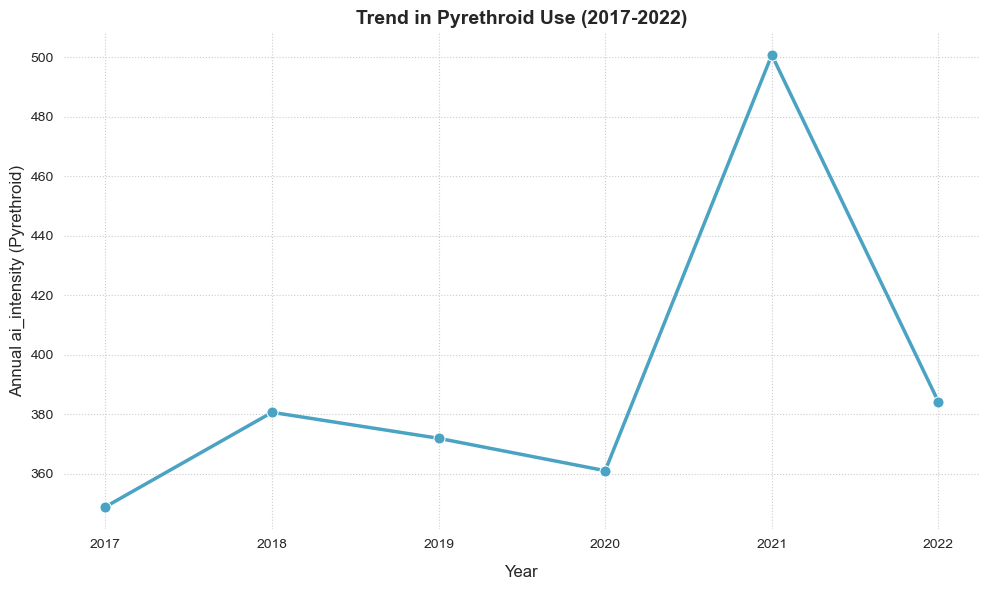

In [6]:
trendPlot("Pyrethroid", [("ai_categories", ["PYR"])], endpoint="county")